Tim MiBAI-Marija Kurić i Barbara Medica(2.godina prijediplomskog studija informatika, redovni), kolegij:Umjetna inteligencija

1.UVOD:
Cilj ovog zadatka je razviti AI model koji klasificira nepoznate uzorke po klasama.
 Klasifikator se trenira nad skupom train_data.csv, dok se testiranje vrši na skupu test_data.csv. Predikcije se zatim učitavaju na Kaggle.

2.TEORIJSKI PRIKAZ ALGORITAMA I KORIŠTENIH POSTUPAKA
U ovom radu koristimo Random Forest algoritam – metodu temeljenu na stablima odlučivanja. Random Forest kombinira više stabala, čime se postiže bolja generalizacija i otpornost na overfitting. 

Osnovne karakteristike algoritma:
Kombinacija više stabala odlučivanja (bagging).
Svako stablo u šumi trenira se na različitom uzorku podataka.
Na testu se koristi većinsko glasanje ("majority voting").

Također primjenjujemo:
StandardScaler za skaliranje podataka (standardizacija).
Train/Test split za evaluaciju modela prije stvarne primjene.

In [ ]:
3.OPIS I PRIPREMA KORIŠTENIH PODATAKA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Učitavanje podataka
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

print("Primjer iz trening skupa:")
display(train_df.head())

print("Primjer iz test skupa:")
display(test_df.head())

print("Provjera nedostajućih vrijednosti u train skupu:")
print(train_df.isnull().sum())

print("Provjera nedostajućih vrijednosti u test skupu:")
print(test_df.isnull().sum())

Opis podataka:
Skup sadrži 9 značajki (feature_0 do feature_8).
Ciljna varijabla class označava kojoj klasi podatak pripada (vrijednosti od 0 do 9).
Test skup nema class kolonu — koristi se isključivo za predikciju.

4.MODELIRANJE, TRENIRANJE I EVALUACIJA
# Razdvajanje značajki i ciljne varijable
X = train_df.drop(columns=['class'])
y = train_df['class']
X_test_final = test_df.copy()

# Standardizacija podataka
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# Podjela trening podataka na tren/validacijski skup
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treniranje modela
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluacija na validacijskom skupu
y_val_pred = model.predict(X_val)

print("Izvještaj klasifikacije:")
print(classification_report(y_val, y_val_pred))
print("Točnost:", accuracy_score(y_val, y_val_pred))


In [ ]:
5.VIZUALIZACIJA VAŽNOSTI ZNAČAJKI 
# Prikaz značajki koje su najviše doprinijele klasifikaciji
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Važnost značajki:")
display(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.title("Važnost značajki")
plt.xlabel("Važnost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


6.PREDIKCIJA I KREIRANJE CSV DATOTEKE ZA KAGGLE
# Predikcija klasa na test podacima
test_preds = model.predict(X_test_scaled)

# Kreiranje DataFrame-a za predaju
submission_df = pd.DataFrame({
    "ID": list(range(len(test_preds))),
    "class": test_preds
})

# Spremanje bez indeksa
submission_df.to_csv("submission.csv", index=False)
print("Pregled rezultata za predaju:")
display(submission_df.head())


7.PRIKAZ REZULTATA
Trenirani model daje 92.750 točnosti.
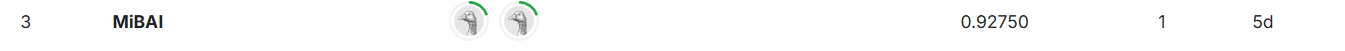

8.ZAKLJUČAK
Model Random Forest pokazao se kao stabilno i učinkovito rješenje za problem klasifikacije s višestrukim klasama.
Postignuta točnost na validacijskom skupu je zadovoljavajuća i pokazuje dobar potencijal generalizacije.

Prednosti:
- Jednostavna interpretacija važnosti značajki.
- Dobri rezultati bez intenzivnog podešavanja hiperparametara.

Model je korišten za generiranje predikcija na test podacima i spremanje u `submission.csv`, spremno za evaluaciju na Kaggle platformi.


9.REFERENCE
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://pandas.pydata.org/
- https://numpy.org/
- https://matplotlib.org/
